In [1]:
import pandas as pd
df=pd.read_json("train.json")
print("Training set:\n",df)
df1=pd.read_json("test.json")
print("Testing set:\n",df1)

Training set:
           id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]
Testing set:
          id          

In [2]:
print("Missing values in training set:\n", df.isnull().sum())
print("Missing values in testing set:\n", df1.isnull().sum())

Missing values in training set:
 id             0
cuisine        0
ingredients    0
dtype: int64
Missing values in testing set:
 id             0
ingredients    0
dtype: int64


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))
df1['ingredients_str'] = df1['ingredients'].apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df['ingredients_str'])
X_test = vectorizer.transform(df1['ingredients_str'])

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(df['cuisine'])

In [6]:
print(y_train)

[ 6 16  4 ...  8  3 13]


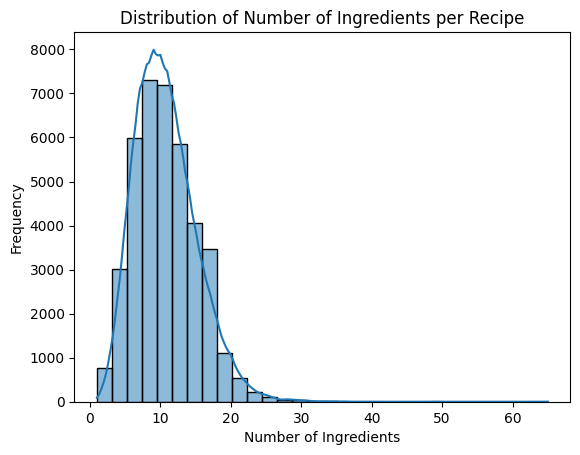

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df['num_ingredients'] = df['ingredients'].apply(len)
sns.histplot(df['num_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

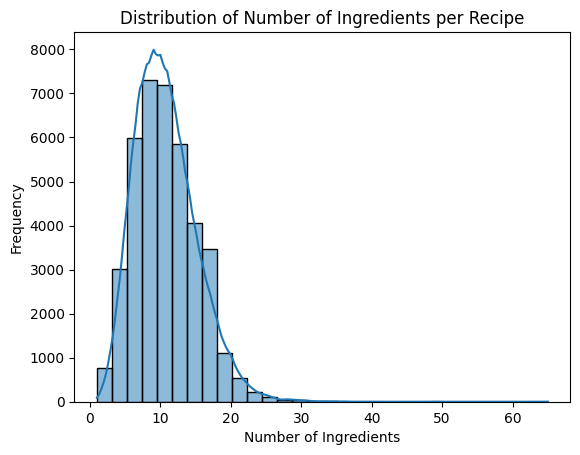

Number of outliers before handling: 1004
Number of recipes after removing outliers: 38770


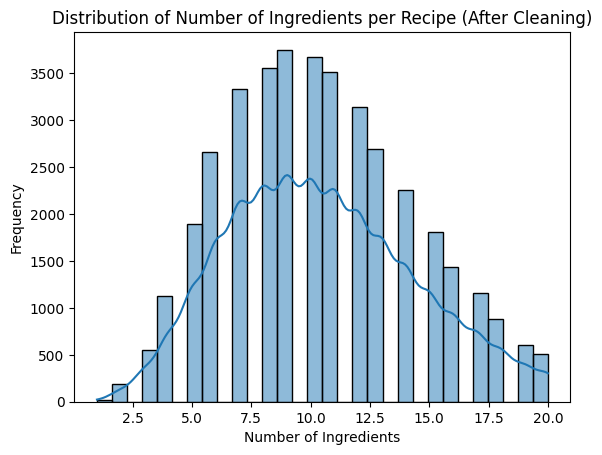

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_json("train.json")
df['num_ingredients'] = df['ingredients'].apply(len)
sns.histplot(df['num_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

Q1 = df['num_ingredients'].quantile(0.25)
Q3 = df['num_ingredients'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['num_ingredients'] < lower_bound) | (df['num_ingredients'] > upper_bound)]
print(f"Number of outliers before handling: {len(outliers)}")

df_cleaned = df[(df['num_ingredients'] >= lower_bound) & (df['num_ingredients'] <= upper_bound)]
print(f"Number of recipes after removing outliers: {len(df_cleaned)}")
sns.histplot(df_cleaned['num_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients per Recipe (After Cleaning)')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()


In [17]:
import pandas as pd

df = pd.read_json("train.json")

df['num_ingredients'] = df['ingredients'].apply(len)

Q1 = df['num_ingredients'].quantile(0.25)
Q3 = df['num_ingredients'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['num_ingredients'] < lower_bound) | (df['num_ingredients'] > upper_bound)]

num_outliers = len(outliers)

print(f"Number of outliers in 'num_ingredients' column (Original Dataset): {num_outliers}")

df_cleaned['num_ingredients'] = df_cleaned['ingredients'].apply(len)

outliers_cleaned = df_cleaned[(df_cleaned['num_ingredients'] < lower_bound) | (df_cleaned['num_ingredients'] > upper_bound)]

num_outliers_cleaned = len(outliers_cleaned)

print(f"Number of outliers in 'num_ingredients' column (Cleaned Dataset): {num_outliers_cleaned}")

Number of outliers in 'num_ingredients' column (Original Dataset): 1004
Number of outliers in 'num_ingredients' column (Cleaned Dataset): 0


In [18]:
import pandas as pd

train_df = pd.read_json("train.json")
test_df = pd.read_json("test.json")

print("Columns of train.json:")
print(train_df.columns)

print("\nColumns of test.json:")
print(test_df.columns)

Columns of train.json:
Index(['id', 'cuisine', 'ingredients'], dtype='object')

Columns of test.json:
Index(['id', 'ingredients'], dtype='object')


In [20]:
import pandas as pd

test_df = pd.read_json("test.json")

test_df.drop('ingredients', axis=1, inplace=True)
print("Updated test_df:")
print(test_df.head())  

print("\nColumns of test_df after dropping 'ingredients':")
print(test_df.columns)

Updated test_df:
      id
0  18009
1  28583
2  41580
3  29752
4  35687

Columns of test_df after dropping 'ingredients':
Index(['id'], dtype='object')


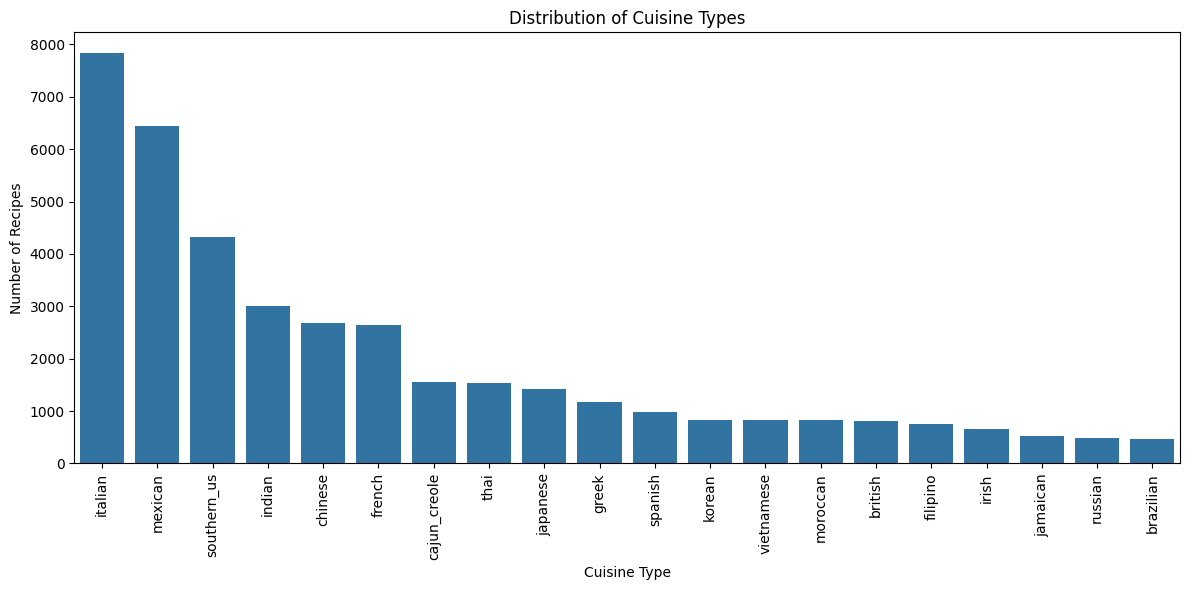

Counts of each cuisine type:
cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64
Imbalance ratios for each cuisine type:
italian: 0.1971
mexican: 0.1619
southern_us: 0.1086
indian: 0.0755
chinese: 0.0672
french: 0.0665
cajun_creole: 0.0389
thai: 0.0387
japanese: 0.0358
greek: 0.0295
spanish: 0.0249
korean: 0.0209
vietnamese: 0.0207
moroccan: 0.0206
british: 0.0202
filipino: 0.0190
irish: 0.0168
jamaican: 0.0132
russian: 0.0123
brazilian: 0.0117


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_json("train.json")

cuisine_counts = train_df['cuisine'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine', data=train_df, order=cuisine_counts.index)
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Counts of each cuisine type:")
print(cuisine_counts)

total_samples = len(train_df)
imbalance_ratios = cuisine_counts / total_samples

print("Imbalance ratios for each cuisine type:")
for cuisine, ratio in imbalance_ratios.items():
    print(f"{cuisine}: {ratio:.4f}")


In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = train_df.drop(['id', 'cuisine'], axis=1)  # Features (ingredients)
y = train_df['cuisine']  # Target (cuisine)

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

pipeline = Pipeline(steps=[('o', ros)])

X_resampled, y_resampled = pipeline.fit_resample(X, y)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)


ValueError: setting an array element with a sequence.

In [24]:
print(type(X_resampled))
print(type(y_resampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
import numpy as np

X_resampled_array = X_resampled.values

y_resampled_array = y_resampled.values

print("X_resampled_array type and shape:", type(X_resampled_array), X_resampled_array.shape)
print("y_resampled_array type and shape:", type(y_resampled_array), y_resampled_array.shape)

X_resampled_array type and shape: <class 'numpy.ndarray'> (156760, 1)
y_resampled_array type and shape: <class 'numpy.ndarray'> (156760,)


In [28]:
class_counts = y_resampled.value_counts()

imbalance_ratios = class_counts / len(y_resampled)

print("Counts of each class:")
print(class_counts)

print("\nImbalance ratios for each class:")
print(imbalance_ratios)

Counts of each class:
cuisine
greek           7838
southern_us     7838
moroccan        7838
korean          7838
irish           7838
japanese        7838
french          7838
brazilian       7838
cajun_creole    7838
vietnamese      7838
thai            7838
british         7838
chinese         7838
mexican         7838
italian         7838
spanish         7838
jamaican        7838
indian          7838
filipino        7838
russian         7838
Name: count, dtype: int64

Imbalance ratios for each class:
cuisine
greek           0.05
southern_us     0.05
moroccan        0.05
korean          0.05
irish           0.05
japanese        0.05
french          0.05
brazilian       0.05
cajun_creole    0.05
vietnamese      0.05
thai            0.05
british         0.05
chinese         0.05
mexican         0.05
italian         0.05
spanish         0.05
jamaican        0.05
indian          0.05
filipino        0.05
russian         0.05
Name: count, dtype: float64


In [31]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

train_df = pd.read_json("train.json")

X = train_df['ingredients'].apply(lambda x: ' '.join(x))  
Y = train_df['cuisine']

vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_transformed, Y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(vectorizer.get_feature_names_out())
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']
print(featuresScores)

          Specs       Score
0            00    4.074509
1            10   12.139760
2           100   32.850213
3            14    9.784263
4            15   15.534017
...         ...         ...
3005      zesty   30.439063
3006  zinfandel   51.941642
3007       ziti  130.624621
3008   zucchini  434.462793
3009     épices   20.238690

[3010 rows x 2 columns]


In [32]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
train_df = pd.read_json("train.json")
X = train_df['ingredients'].apply(lambda x: ' '.join(x))

vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)
pca = PCA(n_components=10)  

X_pca = pca.fit_transform(X_transformed.toarray())
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.07004488 0.04005208 0.03476864 0.03157938 0.02651543 0.0239151
 0.02214118 0.02097905 0.01801523 0.01566779]


In [33]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['cuisine'])  
y = df_cleaned['cuisine']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (31016, 3) (31016,)
Testing set shape: (7754, 3) (7754,)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['cuisine'])  
y = df_cleaned['cuisine'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (31016, 3) (31016,)
Testing set shape: (7754, 3) (7754,)


In [37]:
print(X_train.dtypes)
print(X_train.head())

id                  int64
ingredients        object
num_ingredients     int64
dtype: object
          id                                        ingredients  \
26134   5537  [pickled jalapeno peppers, non-fat sour cream,...   
17666   9233  [tomatoes, jalapeno chilies, ground cumin, cor...   
26114   8757  [sugar, baking soda, milk, all-purpose flour, ...   
9654   11232  [brown sugar, milk, boiling water, dried fruit...   
34097  45588  [ground black pepper, butter, boneless skinles...   

       num_ingredients  
26134                5  
17666               10  
26114                7  
9654                 9  
34097                9  


In [39]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
ingredients_encoded = mlb.fit_transform(X_train['ingredients'])

ingredients_df = pd.DataFrame(ingredients_encoded, columns=mlb.classes_)

X_train_processed = pd.concat([X_train.drop(columns=['ingredients']), ingredients_df], axis=1)

In [41]:
print(X_train_processed.dtypes)
print(X_train_processed.head())

id                                 float64
num_ingredients                    float64
(    oz.) tomato sauce             float64
(   oz.) tomato paste              float64
(10 oz.) frozen chopped spinach    float64
                                    ...   
zesty italian dressing             float64
zinfandel                          float64
ziti                               float64
zucchini                           float64
zucchini blossoms                  float64
Length: 6217, dtype: object
            id  num_ingredients  (    oz.) tomato sauce  \
26134   5537.0              5.0                     0.0   
17666   9233.0             10.0                     0.0   
26114   8757.0              7.0                     0.0   
9654   11232.0              9.0                     0.0   
34097  45588.0              9.0                     NaN   

       (   oz.) tomato paste  (10 oz.) frozen chopped spinach  \
26134                    0.0                              0.0   
17666         

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train_processed)

In [43]:
print(X_train_imputed)

[[5.53700000e+03 5.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.23300000e+03 1.00000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.75700000e+03 7.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.48912037e+04 1.04529920e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.48912037e+04 1.04529920e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.48912037e+04 1.04529920e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [45]:
print("X_train_imputed shape:", X_train_imputed.shape)
print("y_train shape:", y_train.shape)

X_train_imputed shape: (37826, 6217)
y_train shape: (31016,)


In [47]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

X_train = X_train.iloc[:len(y_train)]

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_test)

y_pred = logreg.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.19731751354139798


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, random_state=42)  # Increased max_iter
)

pipeline.fit(X_train_imputed, y_train)

y_pred = pipeline.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy after scaling:", accuracy)

Logistic Regression Accuracy after scaling: 0.20299200412690224


In [63]:
print(train_df.columns)

Index(['id', 'cuisine', 'ingredients'], dtype='object')


In [64]:
print(test_df.columns)

Index(['id'], dtype='object')


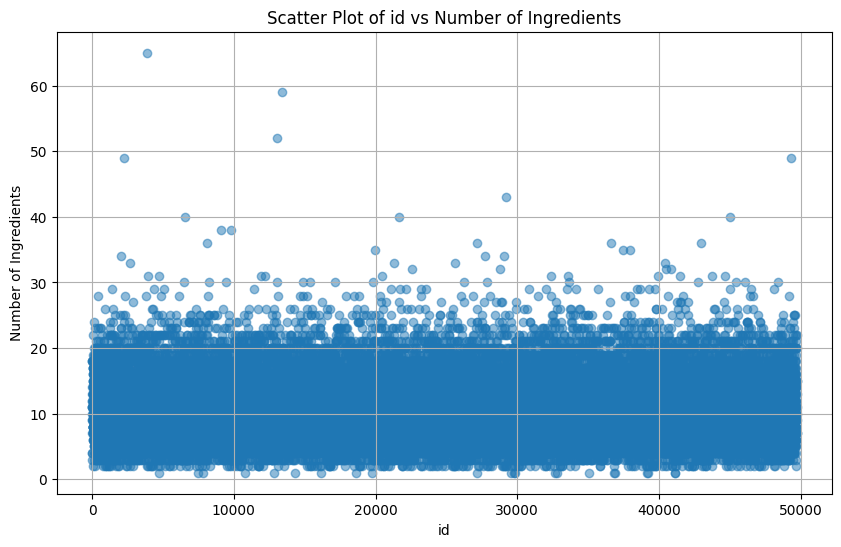

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
plt.scatter(df['id'], df['num_ingredients'], alpha=0.5)
plt.title('Scatter Plot of id vs Number of Ingredients')
plt.xlabel('id')
plt.ylabel('Number of Ingredients')
plt.grid(True)
plt.show()


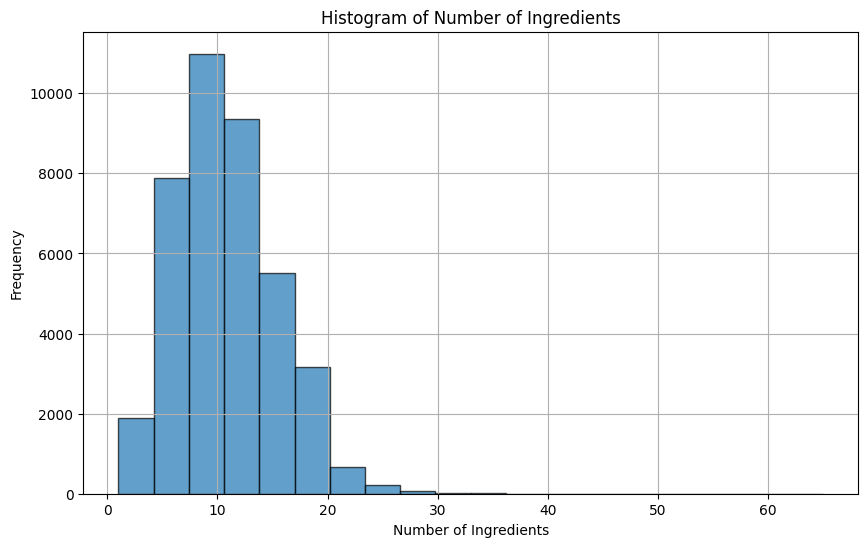

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
plt.hist(df['num_ingredients'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

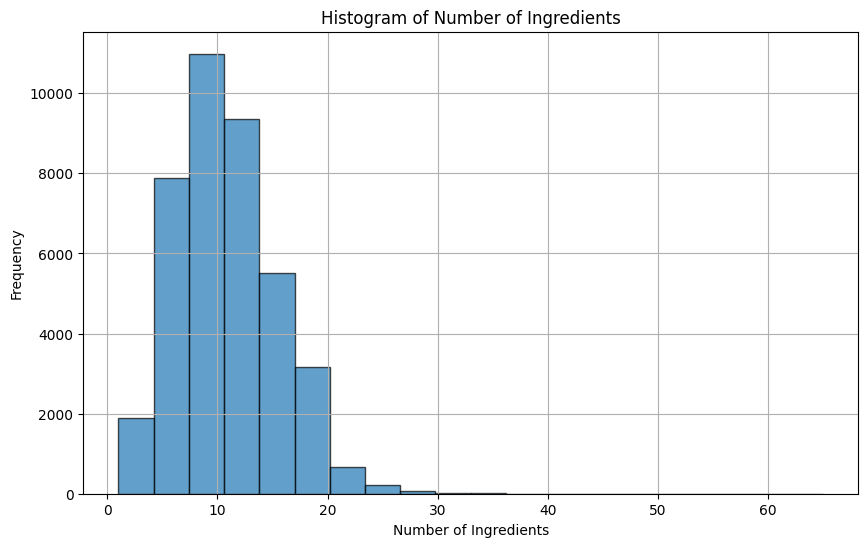

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))
plt.hist(df['num_ingredients'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6372\964797103.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cuisine', palette='Set2')


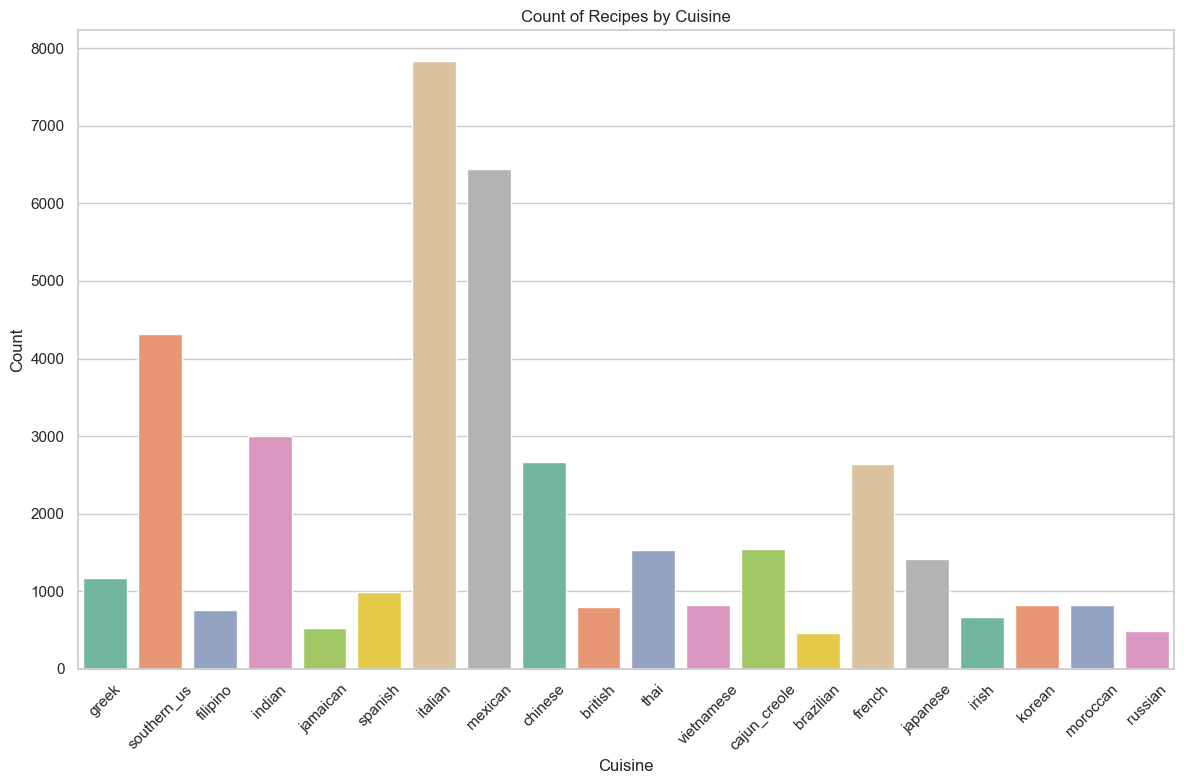

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='cuisine', palette='Set2')
plt.title('Count of Recipes by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

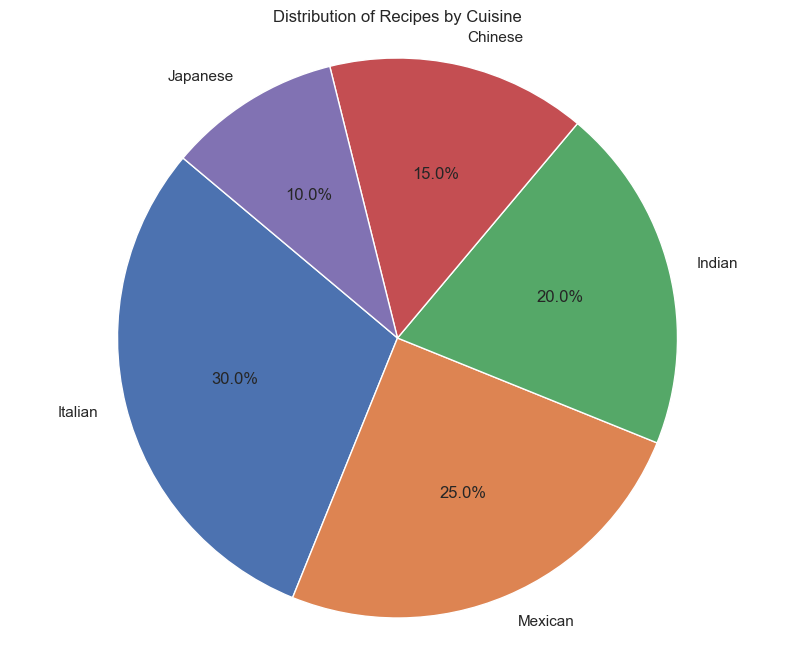

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'cuisine': ['Italian', 'Mexican', 'Indian', 'Chinese', 'Japanese'],
    'count': [300, 250, 200, 150, 100]
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 8))
plt.pie(df['count'], labels=df['cuisine'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Recipes by Cuisine')
plt.axis('equal')  
plt.show()